# 문자를 읽을 수 있는 딥러닝 - 다양한 OCR모델 비교하기 

In [30]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import keras_ocr
import cv2
import pytesseract
from PIL import Image
from pytesseract import Output

## Data

In [35]:
data_path = os.getenv('HOME')+ '/aiffel/ocr_python/image'
data_path

'/aiffel/aiffel/ocr_python/image'

In [36]:
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)
file_path

['/aiffel/aiffel/ocr_python/image/02.jpg',
 '/aiffel/aiffel/ocr_python/image/05.jpg',
 '/aiffel/aiffel/ocr_python/image/06.jpg',
 '/aiffel/aiffel/ocr_python/image/07.jpg',
 '/aiffel/aiffel/ocr_python/image/08.jpg',
 '/aiffel/aiffel/ocr_python/image/09.jpg',
 '/aiffel/aiffel/ocr_python/image/10.jpg',
 '/aiffel/aiffel/ocr_python/image/11.jpg',
 '/aiffel/aiffel/ocr_python/image/12.jpg',
 '/aiffel/aiffel/ocr_python/image/13.jpg',
 '/aiffel/aiffel/ocr_python/image/14.jpg',
 '/aiffel/aiffel/ocr_python/image/15.jpg',
 '/aiffel/aiffel/ocr_python/image/17.jpg',
 '/aiffel/aiffel/ocr_python/image/18.jpg',
 '/aiffel/aiffel/ocr_python/image/19.jpg',
 '/aiffel/aiffel/ocr_python/image/20.jpg',
 '/aiffel/aiffel/ocr_python/image/21.jpg',
 '/aiffel/aiffel/ocr_python/image/22.jpg']

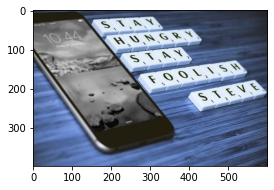

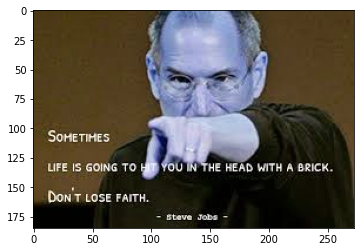

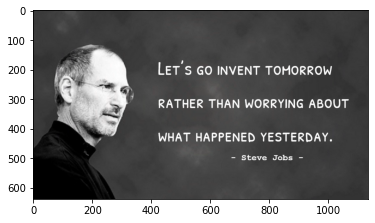

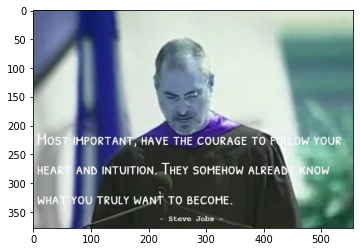

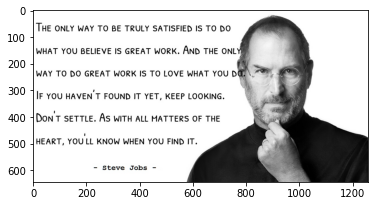

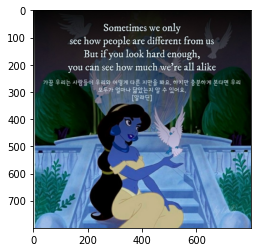

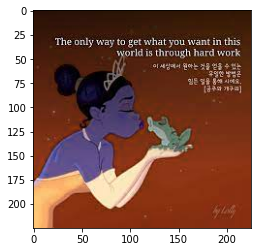

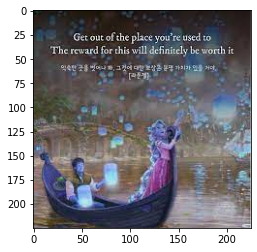

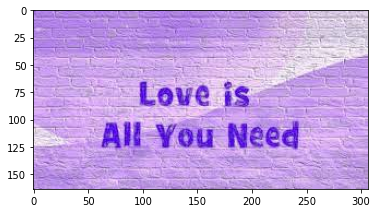

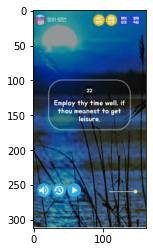

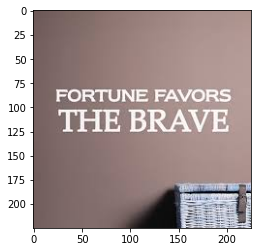

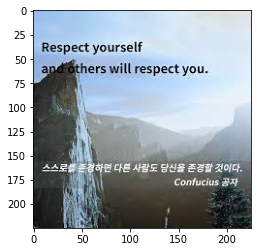

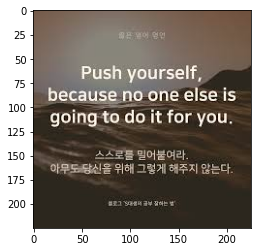

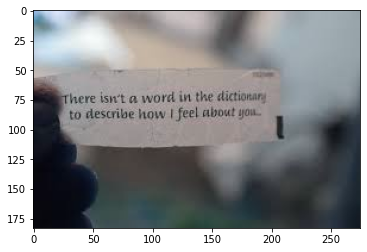

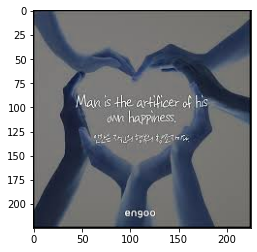

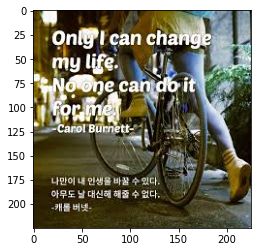

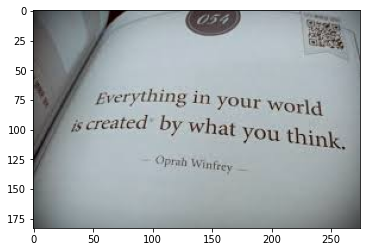

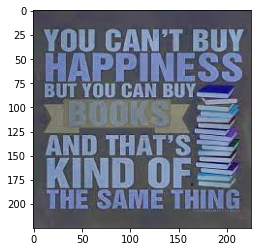

In [46]:
rows = 6
cols = 3
fig = plt.figure(figsize=(20,20))
for idx, path in enumerate(file_path, 1):
    ax = fig.add_subplot(rows, cols, idx)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    plt.imshow(img)
    
    plt.show()

## Keras-OCR

In [42]:
pipeline = keras_ocr.pipeline.Pipeline()


Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [43]:
images = [keras_ocr.tools.read(path) for path in file_path]
prediction_groups = [pipeline.recognize({path}) for path in file_path]

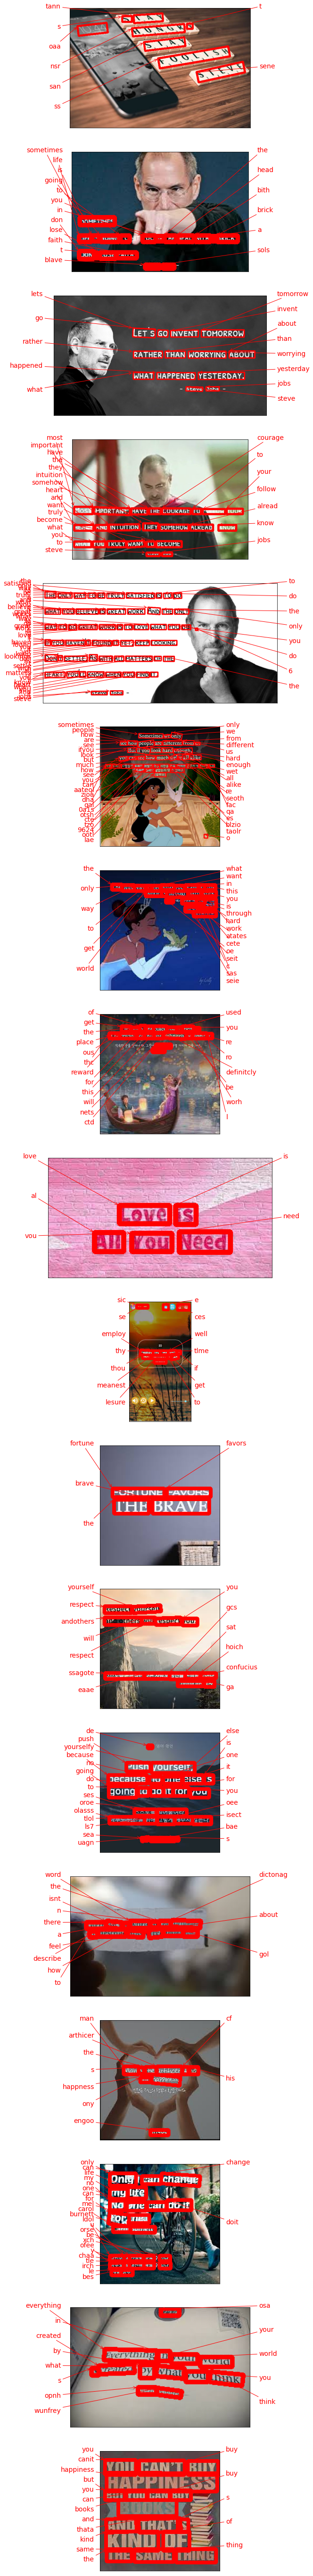

In [45]:
fig, axs = plt.subplots(nrows=len(images), figsize=(100, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx],
                                   predictions=prediction_groups[idx][0], ax=ax)

## Tesseract

In [80]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.jpg")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract/'
img_file_path = work_dir +'09.jpg'  

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/tesseract/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/0003.jpg
/aiffel/aiffel/ocr_python/tesseract/0004.jpg
/aiffel/aiffel/ocr_python/tesseract/0005.jpg
/aiffel/aiffel/ocr_python/tesseract/0006.jpg
/aiffel/aiffel/ocr_python/tesseract/0007.jpg
/aiffel/aiffel/ocr_python/tesseract/0008.jpg
/aiffel/aiffel/ocr_python/tesseract/0009.jpg
/aiffel/aiffel/ocr_python/tesseract/0010.jpg
/aiffel/aiffel/ocr_python/tesseract/0011.jpg
/aiffel/aiffel/ocr_python/tesseract/0012.jpg
/aiffel/aiffel/ocr_python/tesseract/0013.jpg
/aiffel/aiffel/ocr_python/tesseract/0014.jpg
/aiffel/aiffel/ocr_python/tesseract/0015.jpg
/aiffel/aiffel/ocr_python/tesseract/0016.jpg
/aiffel/aiffel/ocr_python/tesseract/0017.jpg
/aiffel/aiffel/ocr_python/tesseract/0018.jpg
/aiffel/aiffel/ocr_python/tesseract/0019.jpg
/aiffel/aiffel/ocr_python/tesseract/0020.jpg
/aiffel/aiffel/ocr_python/tesseract/0021.jpg
/aiffel/ai

In [81]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

Sometimes

we

only

we

avont'

people

are

different

from

an

But

ie

yAere:

look

ve b aa!

Ne

you

‘er

ae

how

i iy .

vari

alike

®

7

7

rt

ee

rue

aed a

ie eo

ats) e ee!

art hoa Bae

LS

Tony

mone


{ ry Rh

at

A a

hho


Done


## 비교시각화

In [82]:
def ocr_model_comparison(img_idx):
    print('Original image:')
    img = cv2.imread(file_path[img_idx], cv2.IMREAD_COLOR)
    plt.imshow(img)
    plt.show()
    
    print('Tesseract result:\n')
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract/'+str(img_idx)
    cropped_image_path = crop_word_regions(file_path[img_idx], work_dir)
    recognize_images(cropped_image_path)
        
    print('keras-ocr result:\n')
    keras_ocr.tools.drawAnnotations(image=images[img_idx], predictions=prediction_groups[img_idx][0])

Original image:


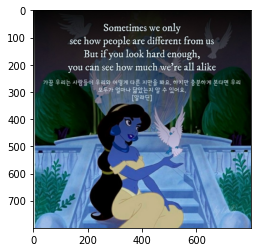

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/5/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0003.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0004.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0005.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0006.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0007.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0008.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0009.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0010.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0011.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0012.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0013.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0014.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0015.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0016.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0017.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0018.jpg
/aiffel/aiffel/ocr_python/tesseract/5/0019.jpg
/aiffel/aiffel/ocr_python/tesseract/5/002

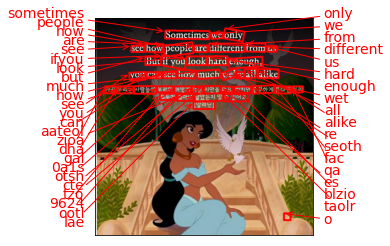

In [84]:
ocr_model_comparison(5)

Original image:


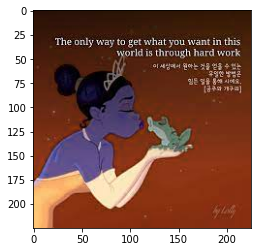

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/6/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0003.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0004.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0005.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0006.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0007.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0008.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0009.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0010.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0011.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0012.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0013.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0014.jpg
/aiffel/aiffel/ocr_python/tesseract/6/0015.jpg
or

a

wa

i

pet

wha

ye

Ste deteis

teh

ga

nara work

ral baa tat LM

foie

Vea Se 28 os

Cee hee)

Sy po

Done
keras-ocr result:



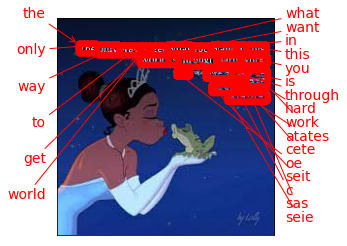

In [85]:
ocr_model_comparison(6)

Original image:


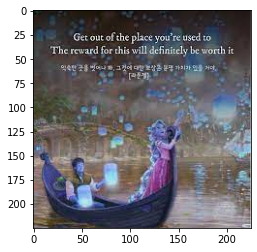

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/7/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/7/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/7/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/7/0003.jpg
SOS e ee emilee ah seat,

PETC eer B ey

erotic sCh


Done
keras-ocr result:



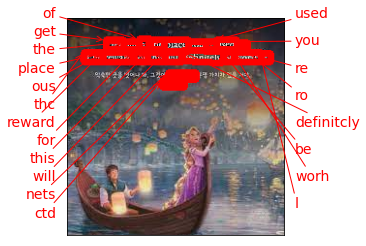

In [86]:
ocr_model_comparison(7)

Original image:


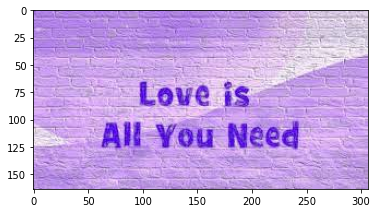

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/8/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/8/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/8/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/8/0003.jpg
/aiffel/aiffel/ocr_python/tesseract/8/0004.jpg
/aiffel/aiffel/ocr_python/tesseract/8/0005.jpg
/aiffel/aiffel/ocr_python/tesseract/8/0006.jpg
/aiffel/aiffel/ocr_python/tesseract/8/0007.jpg
/aiffel/aiffel/ocr_python/tesseract/8/0008.jpg

aS

Love

A

Ali-You

Need


i

i ee ee ee,

Done
keras-ocr result:



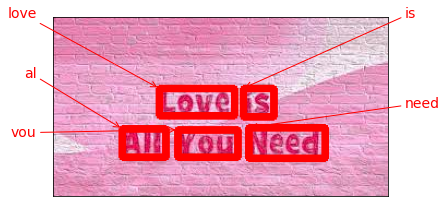

In [87]:
ocr_model_comparison(8)

Original image:


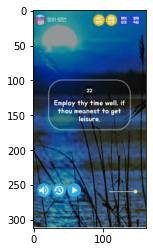

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/9/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/9/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/9/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/9/0003.jpg
/aiffel/aiffel/ocr_python/tesseract/9/0004.jpg
/aiffel/aiffel/ocr_python/tesseract/9/0005.jpg
/aiffel/aiffel/ocr_python/tesseract/9/0006.jpg
/aiffel/aiffel/ocr_python/tesseract/9/0007.jpg
ey

te

|


i mt

al -te sel ee Me)

esure.

—

Done
keras-ocr result:



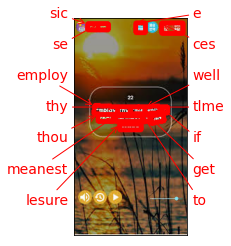

In [88]:
ocr_model_comparison(9)

Original image:


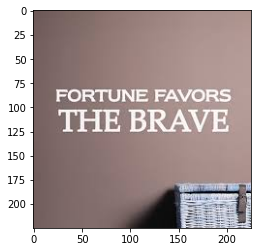

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/10/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/10/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/10/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/10/0003.jpg
/aiffel/aiffel/ocr_python/tesseract/10/0004.jpg
/aiffel/aiffel/ocr_python/tesseract/10/0005.jpg
FORT UNE

rFAVORS

ieee


BRAVE

mn

Done
keras-ocr result:



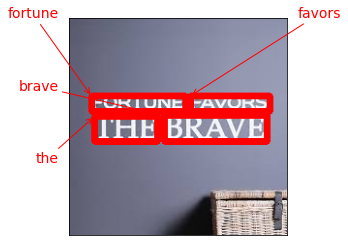

In [89]:
ocr_model_comparison(10)

Original image:


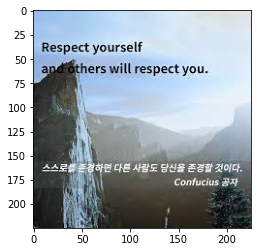

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/11/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/11/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/11/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/11/0003.jpg
/aiffel/aiffel/ocr_python/tesseract/11/0004.jpg
Respect

yourself

ate east eet ea

ws

fn.

Done
keras-ocr result:



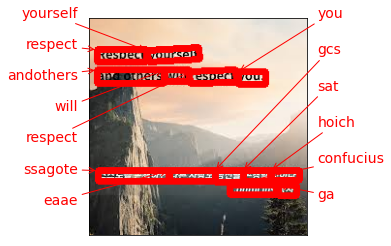

In [90]:
ocr_model_comparison(11)

Original image:


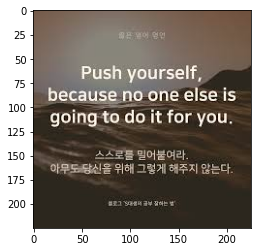

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/12/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0003.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0004.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0005.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0006.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0007.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0008.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0009.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0010.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0011.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0012.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0013.jpg
/aiffel/aiffel/ocr_python/tesseract/12/0014.jpg
| aa

—

i= bh

efelTale mse

a.

Ie

‘outs

for

YOu.


tote e Per

ft) ees

mh,

Chas XI

vimee

Done
keras-ocr result:



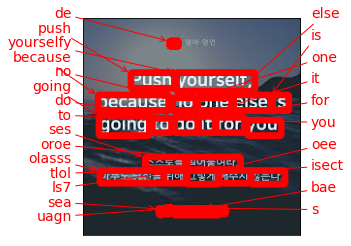

In [91]:
ocr_model_comparison(12)

Original image:


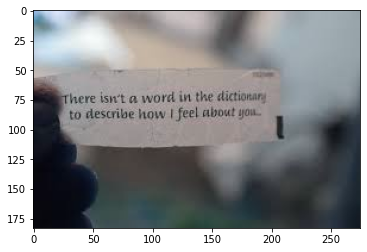

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/13/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/13/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/13/0002.jpg
+

é

sri

Done
keras-ocr result:



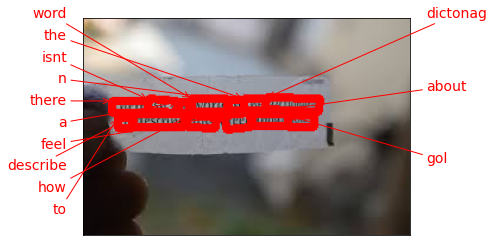

In [92]:
ocr_model_comparison(13)

Original image:


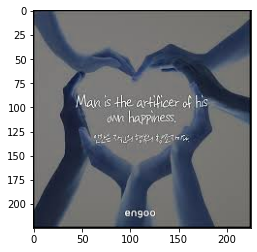

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/14/0000.jpg

Done
keras-ocr result:



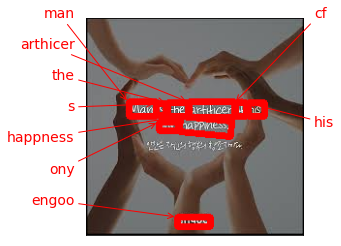

In [93]:
ocr_model_comparison(14)

Original image:


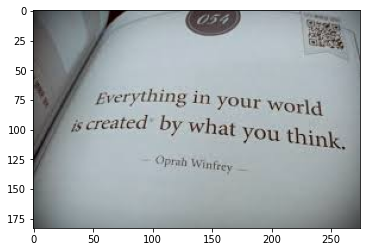

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/16/0000.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0001.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0002.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0003.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0004.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0005.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0006.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0007.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0008.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0009.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0010.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0011.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0012.jpg
/aiffel/aiffel/ocr_python/tesseract/16/0013.jpg
-

a)


fverything

in

your

world

is created

by

what

You

1 think,

pret

Vinfrey

Done
keras-ocr result:



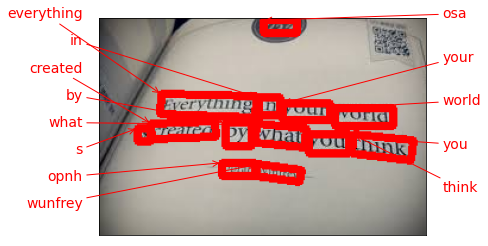

In [94]:
ocr_model_comparison(16)

Original image:


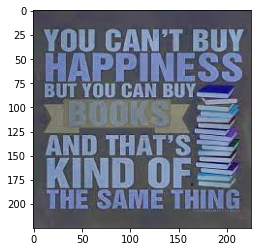

Tesseract result:

/aiffel/aiffel/ocr_python/tesseract/17/0000.jpg
od

Done
keras-ocr result:



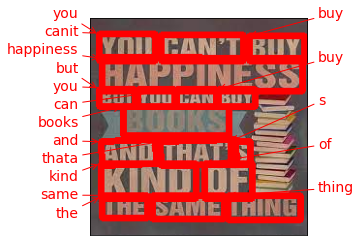

In [95]:
ocr_model_comparison(17)

## 회고

- Google OCR API도 사용해보고 싶었지만 계속 오류가 나사 성공하지는 못하였다. 
- keras-ocr 내가 사용한 이미지들이 robustness가 높지 않은 이미지인지 모르겠지만, 정확도가 가장 높게 보여졌다.
- tesseract 실행할때마다 정확히 실행이 되지 못했던 부분들도 있었고, 인식을 하였다고 해도 정확도가 keras보다 높지 못하다고 판단되었다.